 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

# this ignores the depreciation warnings etc
import warnings
warnings.filterwarnings("ignore")

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns
whale = pd.read_csv('./Resources/whale_returns.csv', parse_dates=True, index_col="Date", infer_datetime_format=True)

In [3]:
# Count nulls
whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale.dropna(inplace = True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [5]:
# Reading algorithmic returns
algo = pd.read_csv('./Resources/algo_returns.csv', parse_dates=True, index_col="Date", infer_datetime_format=True)

In [6]:
# Count nulls
algo.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo.dropna(inplace = True)

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P TSX 60 Closing Prices
sp_tsx = pd.read_csv('./Resources/sp_tsx_history.csv', parse_dates=True, index_col="Date", infer_datetime_format=True)

In [9]:
# Check Data Types
sp_tsx.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
# If any columns have dollar signs or characters other than numeric values, remove those characters and convert the data types as needed.
sp_tsx["Close"] = sp_tsx["Close"].str.replace("$", "")
sp_tsx["Close"] = sp_tsx["Close"].str.replace(",", "")
sp_tsx["Close"] = sp_tsx["Close"].astype("float")

In [11]:
# Calculate Daily Returns
sp_tsx_daily_return = sp_tsx.pct_change()

In [12]:
# Drop nulls
sp_tsx_daily_return.dropna(inplace = True)

In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_daily_return.rename(columns = {"Close":"SP Returns"}, inplace = True)

sp_tsx_daily_return.head(10)

,SP Returns
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
2012-10-10,-0.004982
2012-10-11,0.001763
2012-10-12,-0.002608
2012-10-15,0.002288


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
df_daily_returns = pd.concat([whale, algo,sp_tsx_daily_return], axis = "columns",join = "inner")

# Display head of df
df_daily_returns.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.014321
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,0.006655
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.002139
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.002655


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

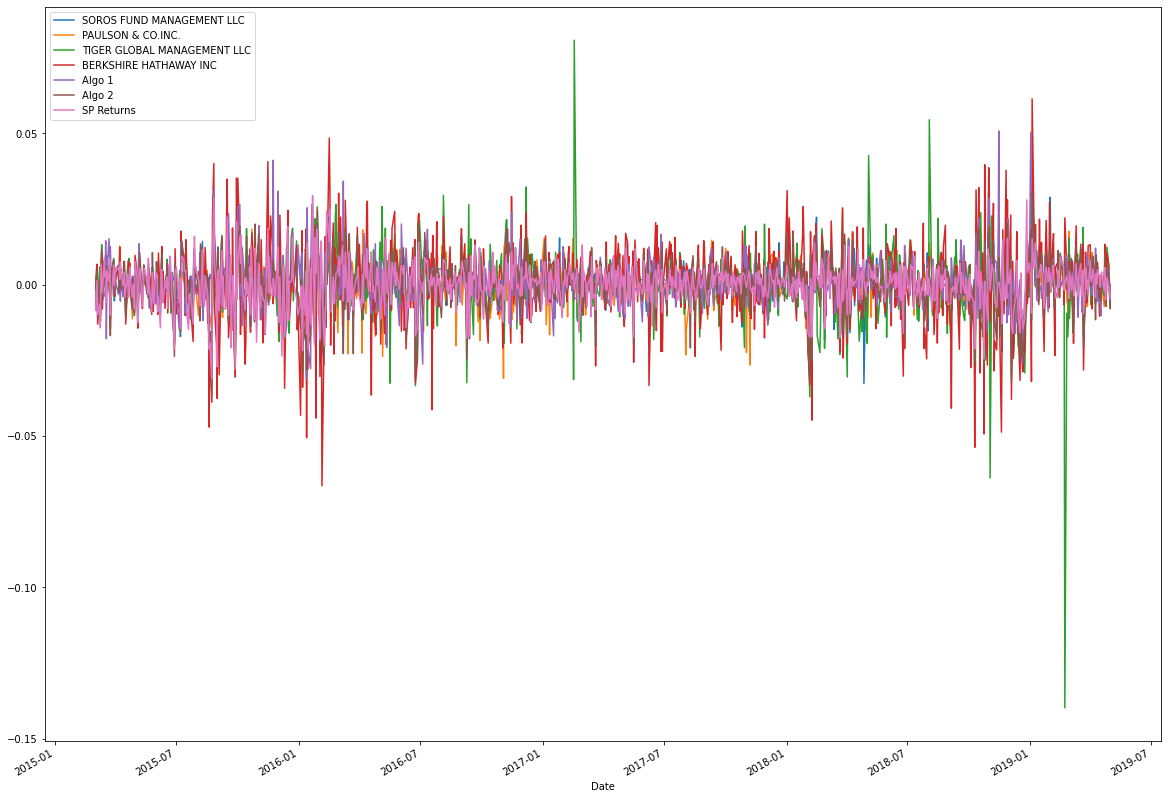

In [15]:
# Plot daily returns of all portfolios
df_daily_returns.plot(figsize = (20,15))
plt.show()

#### Calculate and Plot cumulative returns.

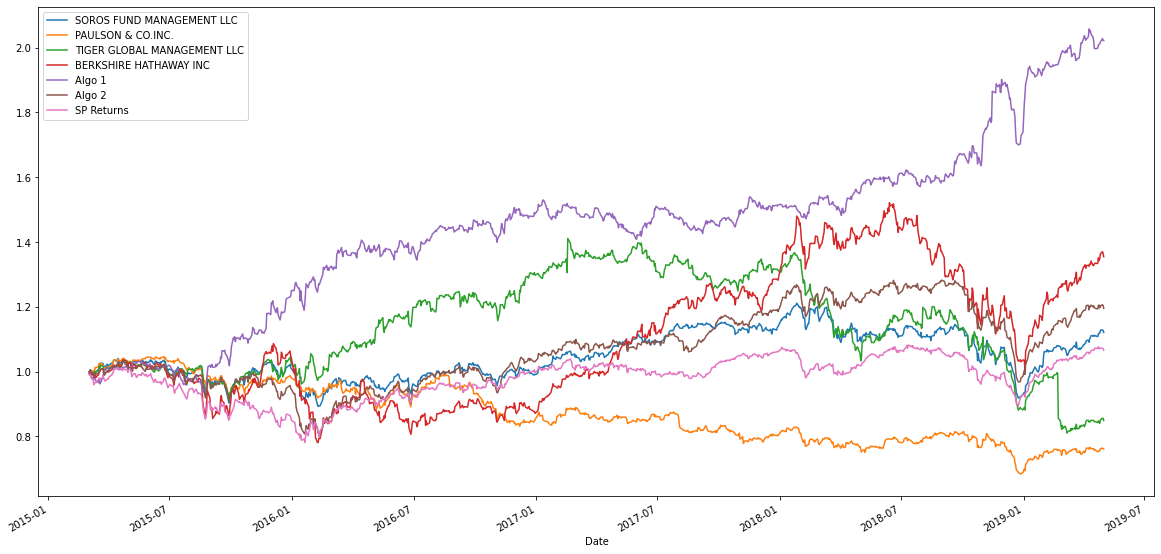

In [16]:
# Calculate cumulative returns of all portfolios
df_cum_returns = (1+ df_daily_returns).cumprod()

# Plot cumulative returns

df_cum_returns.plot(figsize = (20,10))
plt.show()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


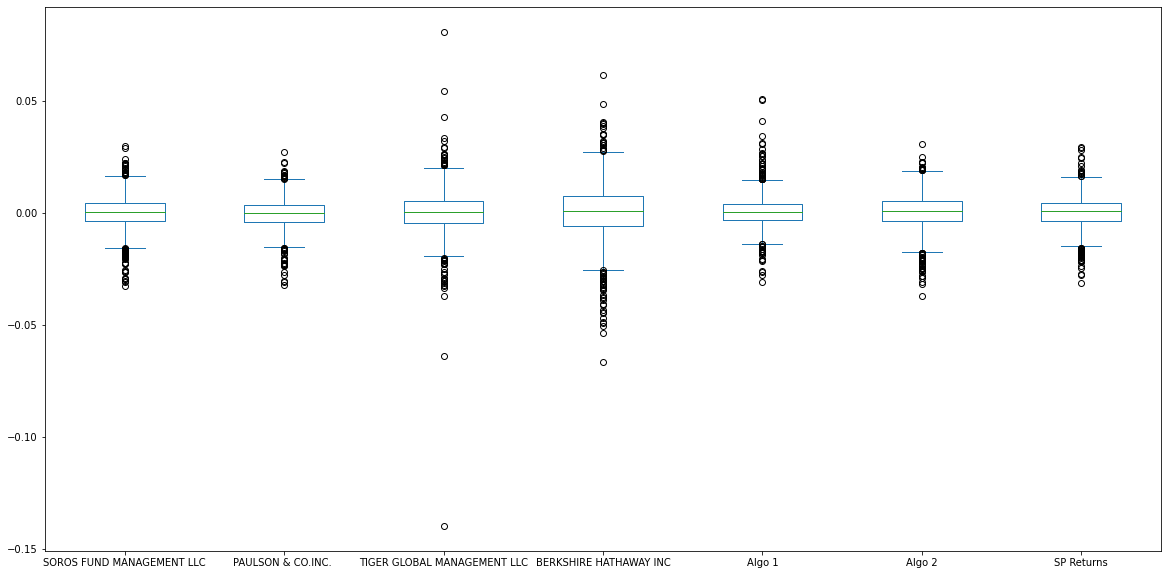

In [17]:
# Box plot to visually show risk
df_daily_returns.plot(kind = "box", figsize = (20,10))
plt.show()

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
df_daily_std = pd.DataFrame(df_daily_returns.std()).rename(columns = {0:"std"})
df_daily_std

,std
SOROS FUND MANAGEMENT LLC,0.007828
PAULSON & CO.INC.,0.006982
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326
SP Returns,0.007034


### Determine which portfolios are riskier than the S&P TSX 60

In [19]:
# Calculate  the daily standard deviation of S&P TSX 60
print(f'Daily SD of S&P TSX 60 is: {df_daily_std.iloc[-1]}')

# Determine which portfolios are riskier than the S&P TSX 60
higher_std = df_daily_std[df_daily_std["std"] > df_daily_std.loc["SP Returns", "std"]]
higher_std

Daily SD of S&P TSX 60 is: std    0.007034
Name: SP Returns, dtype: float64


,std
SOROS FUND MANAGEMENT LLC,0.007828
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326


### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
df_annualized_std = df_daily_std*np.sqrt(252)
df_annualized_std

,std
SOROS FUND MANAGEMENT LLC,0.124259
PAULSON & CO.INC.,0.110841
TIGER GLOBAL MANAGEMENT LLC,0.172759
BERKSHIRE HATHAWAY INC,0.203599
Algo 1,0.120470
Algo 2,0.132177
SP Returns,0.111664


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

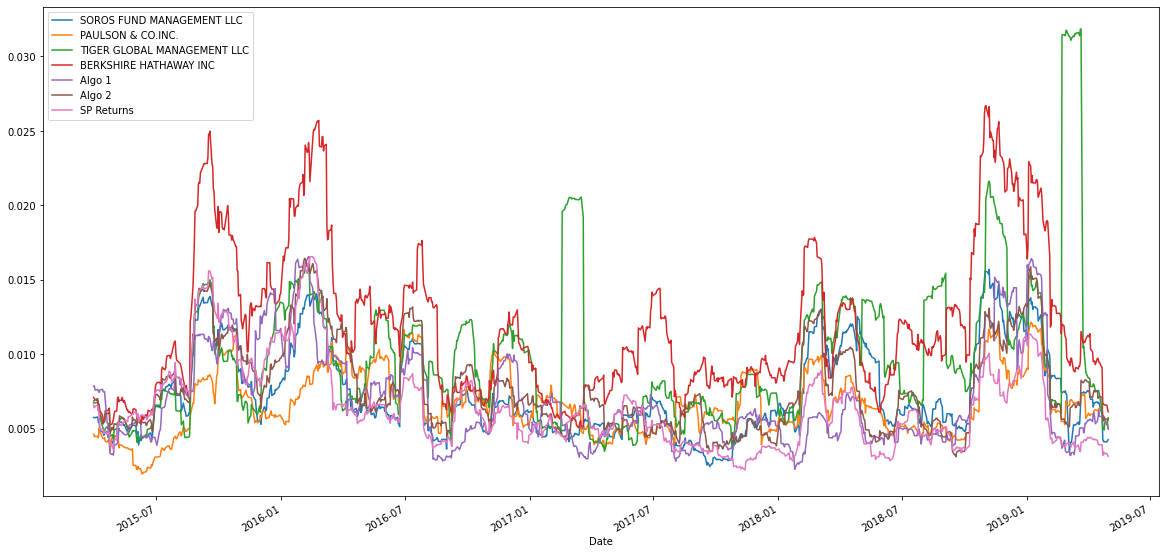

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_21_day = df_daily_returns.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std_21_day.plot(figsize=(20,10))
plt.show()

### Calculate and plot the correlation

In [22]:
# Calculate the correlation
correlation = df_daily_returns.corr()

# Display the correlation matrix
correlation.style.background_gradient(cmap="coolwarm")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
SP Returns,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


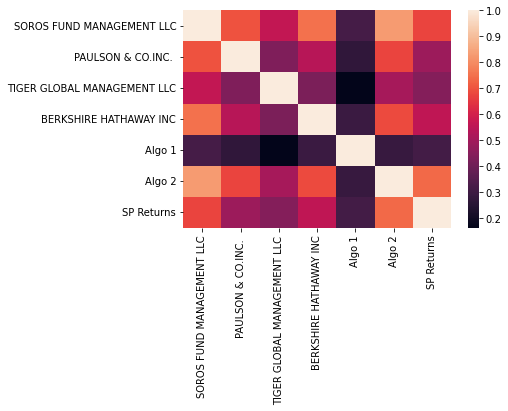

In [23]:
# Display the correlation matrix
import seaborn as sns
sns.heatmap(correlation)
plt.show()

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

BERKSHIRE HATHAWAY INC covariance returns vs S&P TSX 60 is: 5.027336077110013e-05
Variance of S&P TSX 60 is : 4.9479515915131015e-05
Beta of BERKSHIRE HATHAWAY INC is: 1.0160439091063613


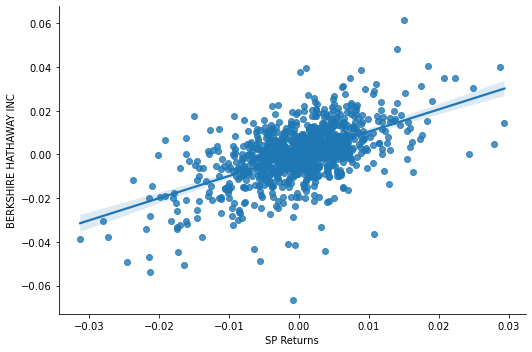

In [24]:
# Calculate covariance of a single portfolio
covariance_berkshire = df_daily_returns['BERKSHIRE HATHAWAY INC'].cov(df_daily_returns['SP Returns'])
print(f'BERKSHIRE HATHAWAY INC covariance returns vs S&P TSX 60 is: {covariance_berkshire}')

# Calculate variance of S&P TSX
variance_berkshire = df_daily_returns['SP Returns'].var()
print(f"Variance of S&P TSX 60 is : {variance_berkshire}")

# Computing beta
beta_berkshire = covariance_berkshire / variance_berkshire
print(f'Beta of BERKSHIRE HATHAWAY INC is: {beta_berkshire}')

# Plot beta trend
sns.lmplot(x="SP Returns", y="BERKSHIRE HATHAWAY INC", data = df_daily_returns, aspect=1.5, fit_reg=True)
plt.show()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

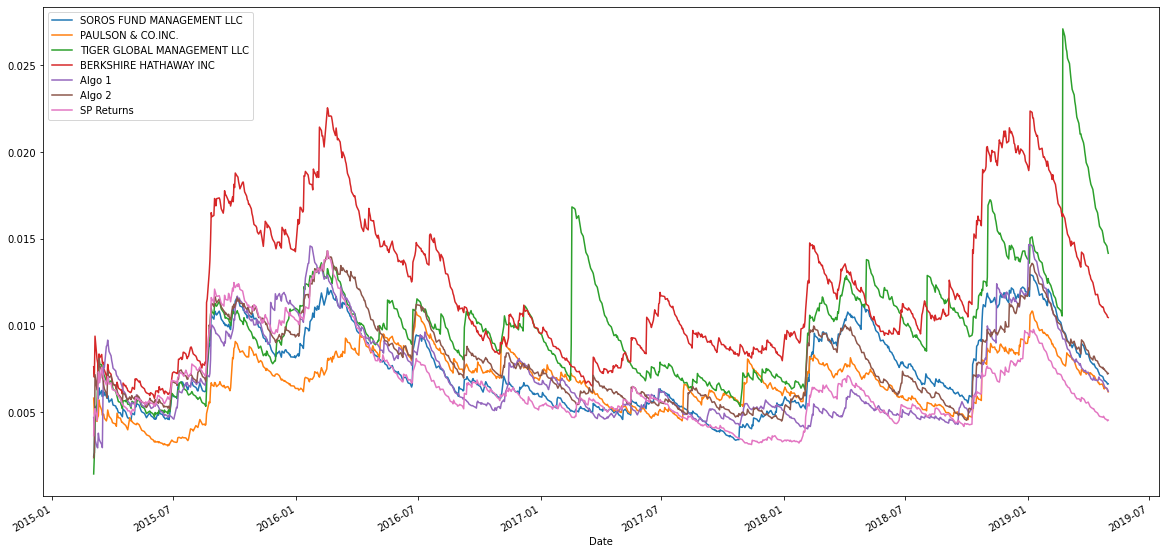

In [25]:
# Use `ewm` to calculate the rolling window
df_daily_returns.ewm(halflife=21).std().plot(figsize=(20,10))
plt.show()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios
sharpe_ratios = df_daily_returns.mean()*252/(df_daily_returns.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
SP Returns                     0.195550
dtype: float64

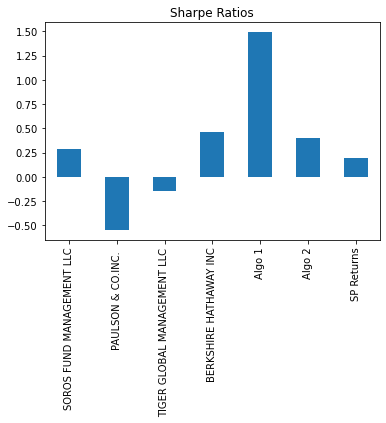

In [27]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")
plt.show()

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

The algorithmic 1 outperformed both the market (S&P TSX 60) and the whales portfolios whereas Algo 2 fell below BERKSHIRE HATHAWAY INC

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [28]:
# Reading data from 1st stock
shop = pd.read_csv('./Resources/shop_historical.csv', parse_dates=True, index_col="Date", infer_datetime_format=True)
shop = shop.rename(columns={"Close" : "Shop"})
shop.head()

,Symbol,Shop
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [29]:
# Reading data from 2nd stock
otex = pd.read_csv('./Resources/otex_historical.csv', parse_dates=True, index_col="Date", infer_datetime_format=True)
otex = otex.rename(columns={"Close" : "Otex"})
otex.head()

,Symbol,Otex
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [30]:
# Reading data from 3rd stock
lob = pd.read_csv('./Resources/l_historical.csv', parse_dates=True, index_col="Date", infer_datetime_format=True)
lob = lob.rename(columns={"Close" : "Loblaw"})
lob.head()

,Symbol,Loblaw
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [31]:
# Combine all stocks in a single DataFrame
all_stocks = pd.concat([shop, otex, lob], axis="columns", join="inner")
all_stocks.head()

,Symbol,Shop,Symbol,Otex,Symbol,Loblaw
Date,,,,,,
2018-01-02,SHOP,132.06,OTEX,43.58,L,57.99
2018-01-03,SHOP,135.15,OTEX,43.07,L,57.41
2018-01-04,SHOP,137.46,OTEX,42.91,L,57.42
2018-01-05,SHOP,137.26,OTEX,42.57,L,57.42
2018-01-08,SHOP,139.51,OTEX,42.16,L,56.86


In [32]:
# Reorganize portfolio data by having a column per symbol
###Reorganize portfolio data by having a column per symbol
all_stocks = all_stocks.drop(columns=["Symbol"])
all_stocks.head()

,Shop,Otex,Loblaw
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86


In [44]:
# Sort the index
all_stocks.sort_index()

,Shop,Otex,Loblaw
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86
...,...,...,...
2019-12-20,513.22,58.68,67.90
2019-12-23,511.62,57.89,67.68
2019-12-24,525.39,57.44,67.67


In [46]:
# Calculate daily returns
daily_returns = all_stocks.pct_change()

# Drop NAs
daily_returns.dropna(inplace = True)

# Display sample data
daily_returns.head(10)

,Shop,Otex,Loblaw
Date,,,
2018-01-03,0.023398,-0.011703,-0.010002
2018-01-04,0.017092,-0.003715,0.000174
2018-01-05,-0.001455,-0.007924,0.000000
2018-01-08,0.016392,-0.009631,-0.009753
2018-01-09,-0.011254,-0.000712,0.008969
2018-01-10,0.009787,-0.003323,-0.004881
2018-01-11,-0.001077,0.007145,-0.005430
2018-01-12,0.011643,-0.002838,0.003346
2018-01-15,0.014493,-0.009011,0.007197


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [47]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)

my_portfolio = pd.DataFrame(portfolio_returns)

# Display sample data

my_portfolio.head()

,0
Date,
2018-01-03,0.000565
2018-01-04,0.004517
2018-01-05,-0.003126
2018-01-08,-0.000997
2018-01-09,-0.000999


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [48]:
# Join your returns DataFrame to the original returns DataFrame
df_new_daily_returns = pd.concat([portfolio_returns, df_daily_returns], axis='columns', join='inner')
df_new_daily_returns.rename(columns= {0: "MY PORTFOLIO"},inplace = True )

In [49]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
df_new_daily_returns.dropna(inplace=True)
df_new_daily_returns.sort_index()
df_new_daily_returns.head(10)

,MY PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP Returns
Date,,,,,,,,
2018-01-03,0.000565,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.004517,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,-0.003126,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,-0.000997,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.000999,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097
2018-01-10,0.000528,-0.002753,-0.002290,-0.005720,-0.004781,0.003567,-0.000224,-0.004368
2018-01-11,0.000213,0.010541,0.011773,-0.002063,0.017662,-0.005614,0.016898,0.002400
2018-01-12,0.004051,0.002590,0.002418,0.003807,0.002594,-0.000875,0.002411,0.001304
2018-01-16,-0.008559,-0.005126,-0.005553,0.009646,-0.011962,0.003931,-0.009533,-0.004455


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [51]:
# Calculate the annualized `std`
df_new_daily_std = pd.DataFrame(df_new_daily_returns.std()).rename(columns = {0:"std"})
df_new_annualized_std = df_new_daily_std*np.sqrt(252)
df_new_annualized_std

,std
MY PORTFOLIO,0.224346
SOROS FUND MANAGEMENT LLC,0.145675
PAULSON & CO.INC.,0.114343
TIGER GLOBAL MANAGEMENT LLC,0.219833
BERKSHIRE HATHAWAY INC,0.227445
Algo 1,0.120028
Algo 2,0.137664
SP Returns,0.099121


### Calculate and plot rolling `std` with 21-day window

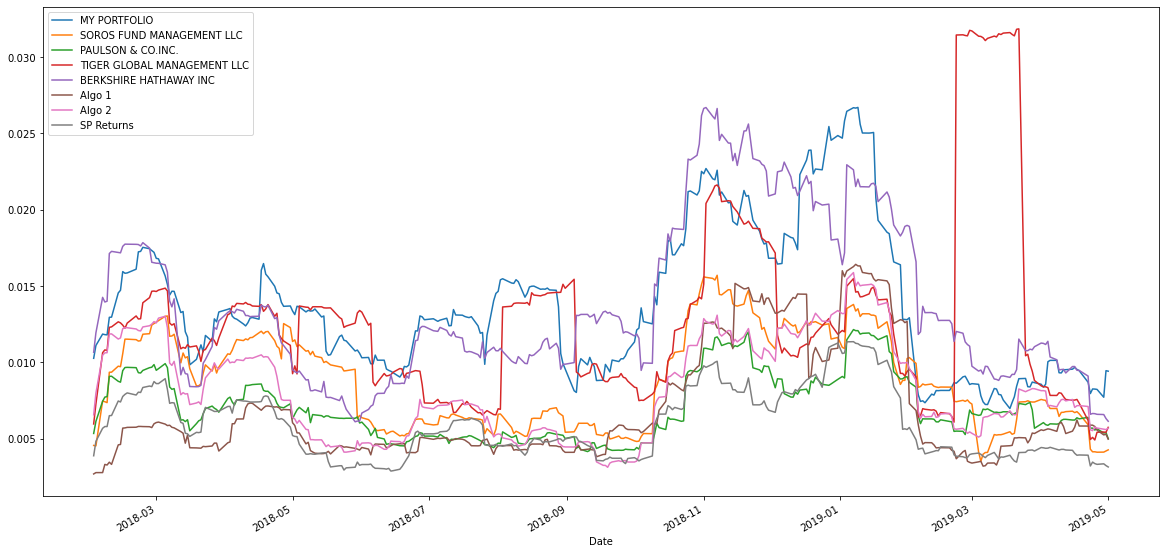

In [52]:
# Calculate rolling standard deviation
rolling_std = df_new_daily_returns.rolling(window=21).std()

# Plot rolling standard deviation
rolling_std.plot(figsize=(20,10))
plt.show()

### Calculate and plot the correlation

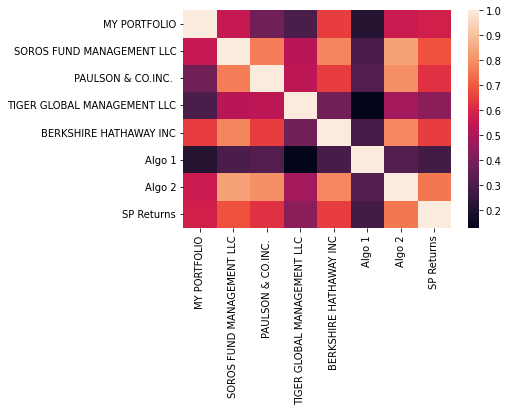

In [53]:
# Calculate and plot the correlation
new_correlation = df_new_daily_returns.corr()
sns.heatmap(new_correlation)
plt.show()

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

Beta of My portfolio is: 1.3109983534075265


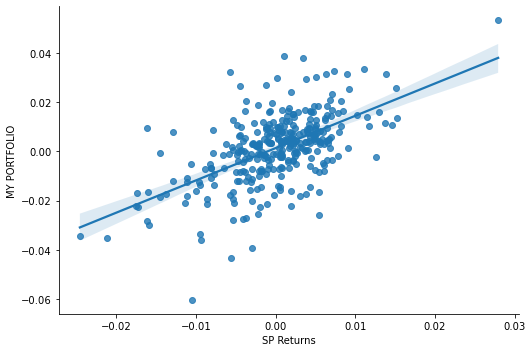

In [57]:
# Calculate and plot Beta
my_covariance = df_new_daily_returns['MY PORTFOLIO'].cov(df_new_daily_returns['SP Returns'])

# Calculate variance of all daily returns
my_variance = df_new_daily_returns['SP Returns'].var()

# Calculate beta of all daily returns of MSFT
my_beta = my_covariance / my_variance
print(f'Beta of My portfolio is: {my_beta}')

#Plot beta
sns.lmplot(x='SP Returns', y='MY PORTFOLIO', data=df_new_daily_returns, aspect=1.5, fit_reg=True)
plt.show()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [59]:
# Calculate Annualized Sharpe Ratios
all_portfolios_sharpe_ratio = df_new_daily_returns.std() * np.sqrt(252)

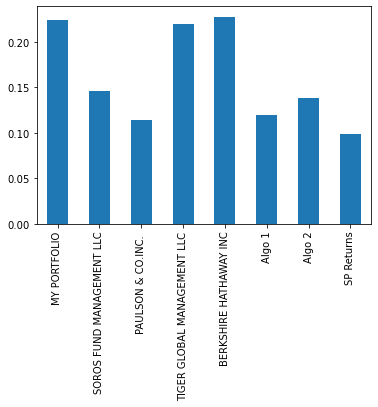

In [60]:
# Visualize the sharpe ratios as a bar plot
all_portfolios_sharpe_ratio.plot(kind="bar")
plt.show()

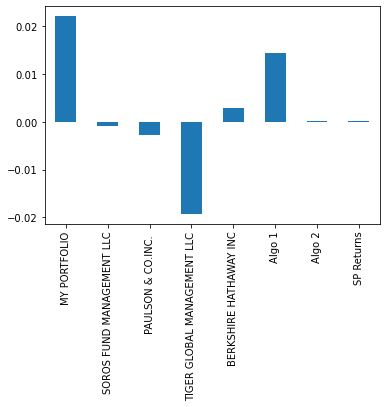

In [62]:
#Averaging sharpe ratios
all_portfolios_avg_sharpe_ratio = df_new_daily_returns.mean() * np.sqrt(252)
all_portfolios_avg_sharpe_ratio.plot(kind="bar")
plt.show()

In [63]:
all_portfolios_avg_sharpe_ratio.sort_values()

TIGER GLOBAL MANAGEMENT LLC   -0.019271
PAULSON & CO.INC.             -0.002854
SOROS FUND MANAGEMENT LLC     -0.000809
Algo 2                         0.000186
SP Returns                     0.000216
BERKSHIRE HATHAWAY INC         0.002807
Algo 1                         0.014377
MY PORTFOLIO                   0.022111
dtype: float64

### How does your portfolio do?

My portfolio of SHOP, OTEX and L stocks outperformed the S&P_TSX 60 index, as well as, the Whales portfolios